In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')

#### Read data from csv file using pandas's read csv method.

In [75]:
df = pd.read_csv('Leads.csv')

In [76]:
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Remove useless columns like Id, number from dataframe.

In [77]:
df.drop(columns=['Prospect ID','Lead Number'], inplace=True)

#### Drop the columns which are created for sales team. Because these columns are for sales team to fill feedback from customers.

In [78]:
df.drop(columns=['Last Activity','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity'], inplace=True)

In [79]:
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


In [80]:
# check the shape
df.shape

(9240, 26)

#### Check all the independent variable and impute null values. In this data "select" means null because user has not selected anything from dropdown. So convert all the select to NaN first.

In [81]:
df.replace('Select', np.nan, inplace=True)

In [82]:
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Country                                          6779 non-null object
Specialization                                   5860 non-null object
How did you hear about X Education               1990 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531

#### check missing values in percentage. So that we can remove more that 25% missing  values. 

In [84]:
df.isna().sum() * 100 /9240 

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

#### Remove 'Country', 'How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course' these columns have more than 25% missing values.

In [85]:
df.drop(columns=['Country', 'Specialization', 'How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course', 'City'], inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
Lead Origin                                 9240 non-null object
Lead Source                                 9204 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9103 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9103 non-null float64
Search                                      9240 non-null object
Magazine                                    9240 non-null object
Newspaper Article                           9240 non-null object
X Education Forums                          9240 non-null object
Newspaper                                   9240 non-null object
Digital Advertisement                       9240

#### Three columns are still with null values that we need to fill. 'Lead Source', 'TotalVisits', 'Page Views Per Visit'

In [87]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
youtubechannel          1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
testone                 1
Name: Lead Source, dtype: int64

In [88]:
#### In the lead source column. Fill most repeted values 'Google' in null values. 
df['Lead Source'].fillna('Google', inplace=True)

#### Make a single category for less repeted values.
Except 'Google', 'Direct Traffic', 'Olark Chat', 'Organic Search' and 'Reference' other are less repeted values. 
So we can combine in a single category 'Social Media'.

In [89]:
df['Lead Source'].replace('google', 'Google',inplace=True)
df['Lead Source'].replace('Welingak Website','Social Media',inplace=True)
df['Lead Source'].replace('Referral Sites', 'Social Media',inplace=True)
df['Lead Source'].replace('Facebook', 'Social Media',inplace=True)
df['Lead Source'].replace('bing', 'Social Media',inplace=True)
df['Lead Source'].replace('Click2call', 'Social Media',inplace=True)
df['Lead Source'].replace('Live Chat', 'Social Media',inplace=True)
df['Lead Source'].replace('Press_Release', 'Social Media',inplace=True)
df['Lead Source'].replace('WeLearn', 'Social Media',inplace=True)
df['Lead Source'].replace('NC_EDM', 'Social Media',inplace=True)
df['Lead Source'].replace('youtubechannel', 'Social Media',inplace=True)
df['Lead Source'].replace('testone', 'Social Media',inplace=True)
df['Lead Source'].replace('welearnblog_Home', 'Social Media',inplace=True)
df['Lead Source'].replace('Pay per Click Ads', 'Social Media',inplace=True)
df['Lead Source'].replace('blog','Social Media',inplace=True)

In [90]:
# Check value counts
df['Lead Source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Social Media       345
Name: Lead Source, dtype: int64

In [91]:
df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [92]:
# Replace most repeted values in null
df['TotalVisits'].fillna(0.0, inplace=True)

In [93]:
#### Most of the visitors visit 0 to 9 times. There are very less visiters who visit more than 8 times. 
#### So we can combine more than 8 visiter in a category of 8.

df.loc[df['TotalVisits'] > 8, 'TotalVisits'] = 8

In [94]:
#### check again
df['TotalVisits'].value_counts()

0.0    2326
2.0    1680
3.0    1306
4.0    1120
8.0     855
5.0     783
6.0     466
1.0     395
7.0     309
Name: TotalVisits, dtype: int64

In [95]:
df['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

In [96]:
df['Page Views Per Visit'].fillna(0.00, inplace=True)

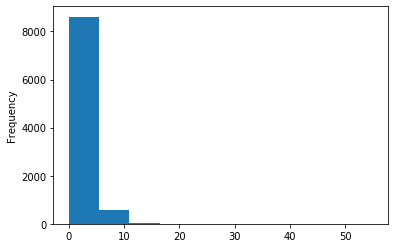

In [97]:
# Let's check distribution of data. So that we can combine less repeted values into single category.
df['Page Views Per Visit'].plot(kind='hist')

In [98]:
# There are very less users, who visited more than 8 pages. 
# So we can categorise more than 8 pages visted users in a single category.

df.loc[df['Page Views Per Visit'] > 8, 'Page Views Per Visit'] = 8

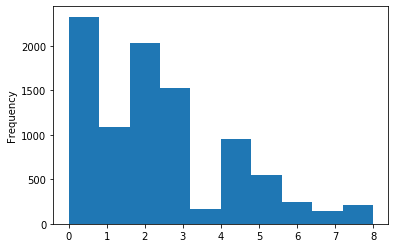

In [99]:
# Check again using histogram
df['Page Views Per Visit'].plot(kind='hist')

In [100]:
# There are many values for page visit. So we can apply binnig to reduce categories

bins = np.linspace(min(df['Page Views Per Visit']), max(df['Page Views Per Visit']), 6)
groupname = [0,2,4,6,8]
df['Page Views Per Visit'] = pd.cut(df['Page Views Per Visit'], bins, labels = groupname, include_lowest=True, duplicates='drop')

In [101]:
df['Page Views Per Visit'].unique()

[0, 2, 4, 8, 6]
Categories (5, int64): [0 < 2 < 4 < 6 < 8]

In [102]:
df['Page Views Per Visit'].value_counts()

2    3550
0    3422
4    1117
6     792
8     359
Name: Page Views Per Visit, dtype: int64

In [103]:
# Check value count in all remaining columns and do feature enginering one by one.
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [104]:
# Replace 'Quick Add Form' with 'Landing page Submission' because it have only one value.
df['Lead Origin'].replace('Quick Add Form', 'Landing Page Submission', inplace=True)
df['Lead Origin'].value_counts()

Landing Page Submission    4887
API                        3580
Lead Add Form               718
Lead Import                  55
Name: Lead Origin, dtype: int64

In [105]:
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [106]:
df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

#### 'Do Not Call' column has only 2 yes. So there is no meaning to use this column. We should drop it.

In [107]:
# This coulumn has diffrent - diffrent values. So we can see all the values in bins for better understanding.
df['Total Time Spent on Website'].value_counts(bins=6)

(-2.2729999999999997, 378.667]    5572
(1136.0, 1514.667]                1108
(757.333, 1136.0]                 1019
(378.667, 757.333]                 970
(1514.667, 1893.333]               514
(1893.333, 2272.0]                  57
Name: Total Time Spent on Website, dtype: int64

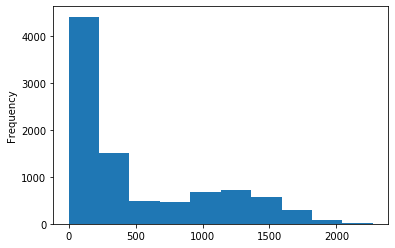

In [108]:
df['Total Time Spent on Website'].plot(kind='hist')

In [109]:
bins = np.linspace(min(df['Total Time Spent on Website']), max(df['Total Time Spent on Website']), 5)
groupname = [1,2,3,4]
df['Total Time Spent on Website'] = pd.cut(df['Total Time Spent on Website'], bins, labels = groupname, include_lowest=True, duplicates='drop')

In [110]:
df['Total Time Spent on Website'].value_counts()

1    6231
3    1461
2    1330
4     218
Name: Total Time Spent on Website, dtype: int64

In [111]:
df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

#### In search column there are very less number of 'Yes'. So we can remove this column.

In [112]:
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

#### Magzine column has 'No' only. So remove it.

In [113]:
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

#### 'Newspaper Article' column also has imbalanced data. So we can remove it.

In [114]:
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

#### 'X Education Forums' column also has imbalanced data. So we can remove it.

In [115]:
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

#### 'Newspaper' column also has imbalanced data. So we can remove it.

In [116]:
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

#### 'Digital Advertisement' column also has imbalanced data. So we can remove it.

In [117]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

#### 'Through Recommendations' column also has imbalanced data. So we can remove it.

In [118]:
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

#### 'Receive More Updates About Our Courses' has single category. So no meaning to keep it.

In [119]:
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

#### 'Update me on Supply Chain Content' has single category. So no meaning to keep it.

In [120]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

#### 'Get updates on DM Content' has single category. So remove it.

In [121]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

#### 'I agree to pay the amount through cheque' has single category. So remove it.

In [122]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### 'A free copy of Mastering The Interview' has balance data. So we should keep it.

#### Below columns have either single value or very less ratio in category. So we can directly remove them
'Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',  'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'

In [123]:
df.drop(columns=['Do Not Call', 'Search','Magazine', 'Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], inplace=True)

In [124]:
df.shape

(9240, 8)

In [125]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,1,0,No
1,API,Organic Search,No,0,5.0,2,2,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,3,2,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,1,0,No
4,Landing Page Submission,Google,No,1,2.0,3,0,No


#### Apply one hot encoding to all the categorical variables

In [126]:
df = pd.get_dummies(data=df, columns=['Lead Origin'], drop_first=True, prefix='LeadOrigin')

In [127]:
df = pd.get_dummies(data=df, columns=['Lead Source'], drop_first=True, prefix='LeadSource')

In [128]:
# Map Yes to 1 and No to 0
df['Do Not Email'] = df['Do Not Email'].map(dict(Yes=1,No=0))

In [129]:
df['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [130]:
df.head(5)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Social Media
0,0,0,0.0,1,0,No,0,0,0,0,1,0,0,0
1,0,0,5.0,2,2,No,0,0,0,0,0,1,0,0
2,0,1,2.0,3,2,Yes,1,0,0,0,0,0,0,0
3,0,0,1.0,1,0,No,1,0,0,0,0,0,0,0
4,0,1,2.0,3,0,No,1,0,0,1,0,0,0,0


In [131]:
# Map Yes to 1 and No to 0
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map(dict(Yes=1, No=0))

In [132]:
df['A free copy of Mastering The Interview'].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### Let's check corrolation

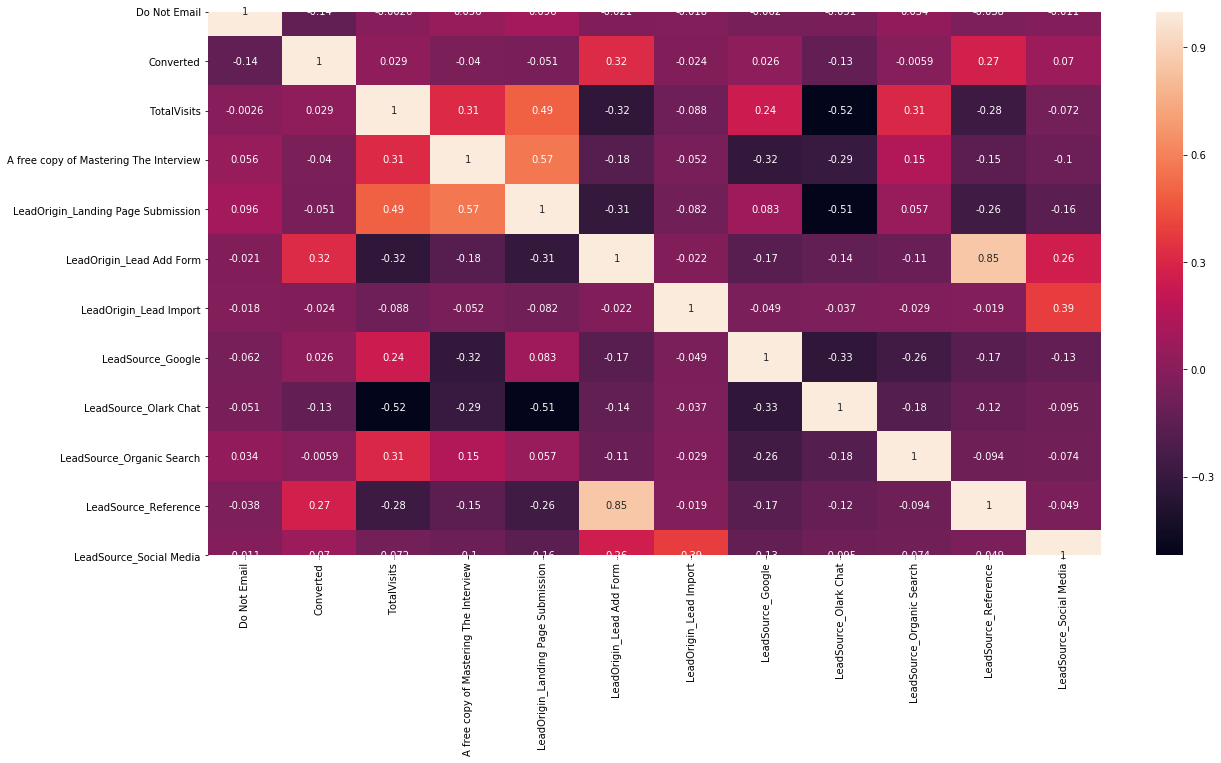

In [133]:
#### check most corrolated fields using heatmap

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure

sns.heatmap(df.corr(),annot = True)

plt.show()

In [134]:
df.corr().abs()

,Do Not Email,Converted,TotalVisits,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Social Media
Do Not Email,1.000000,0.135580,0.002642,0.055762,0.096043,0.020983,0.017529,0.062113,0.051436,0.034295,0.038451,0.011411
Converted,0.135580,1.000000,0.029082,0.039820,0.050963,0.321702,0.023695,0.026286,0.129459,0.005879,0.270830,0.070423
TotalVisits,0.002642,0.029082,1.000000,0.313530,0.494248,0.324635,0.087935,0.244157,0.519590,0.310990,0.276971,0.071523
A free copy of Mastering The Interview,0.055762,0.039820,0.313530,1.000000,0.569493,0.180893,0.052178,0.316310,0.293169,0.147824,0.151987,0.099544
LeadOrigin_Landing Page Submission,0.096043,0.050963,0.494248,0.569493,1.000000,0.307552,0.081991,0.082833,0.513062,0.057485,0.262415,0.162928
LeadOrigin_Lead Add Form,0.020983,0.321702,0.324635,0.180893,0.307552,1.000000,0.022461,0.167161,0.138490,0.109655,0.853237,0.258422
LeadOrigin_Lead Import,0.017529,0.023695,0.087935,0.052178,0.081991,0.022461,1.000000,0.049425,0.037470,0.029233,0.019165,0.385500
LeadSource_Google,0.062113,0.026286,0.244157,0.316310,0.082833,0.167161,0.049425,1.000000,0.328230,0.256078,0.167879,0.133497
LeadSource_Olark Chat,0.051436,0.129459,0.519590,0.293169,0.513062,0.138490,0.037470,0.328230,1.000000,0.182927,0.119923,0.095363
LeadSource_Organic Search,0.034295,0.005879,0.310990,0.147824,0.057485,0.109655,0.029233,0.256078,0.182927,1.000000,0.093562,0.074400


#### Drop highly corrolated dummy variables.

In [135]:
df.drop(columns=['LeadSource_Olark Chat'], inplace=True)

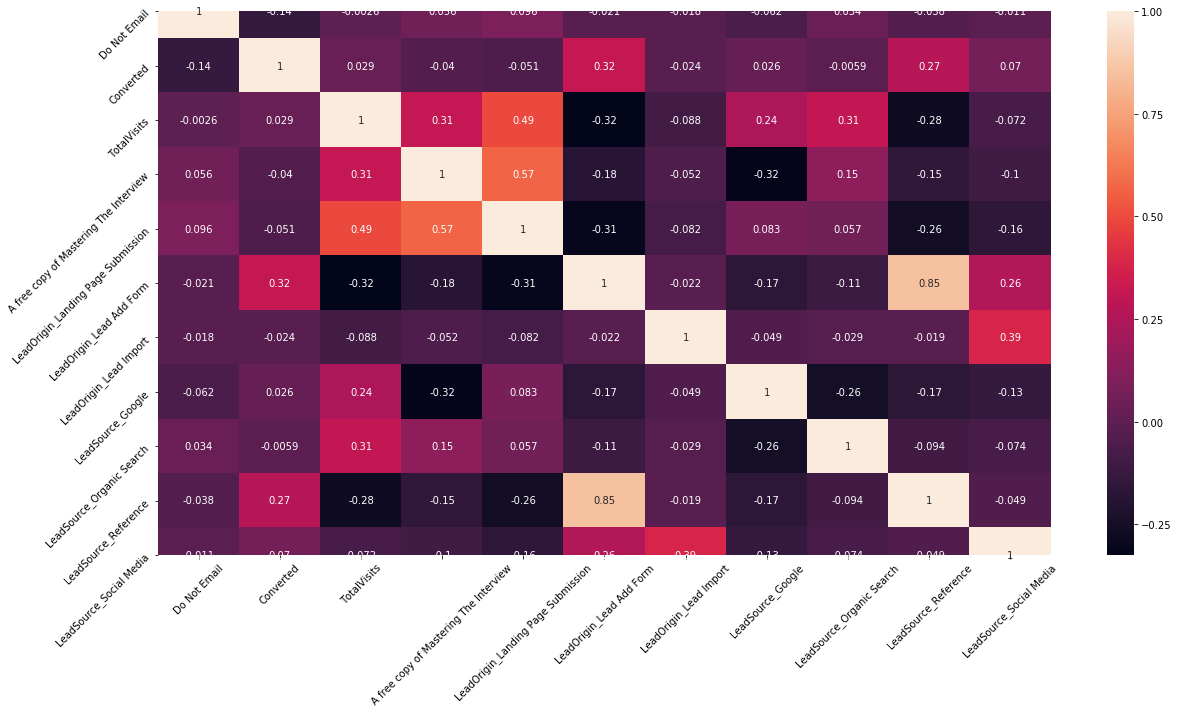

In [136]:
# Check again corrolation using heatmap

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#### There are not much corrolation. So we will continue.

In [137]:
# 'Total Time Spent on Website' and 'Page Views Per Visit' are still categorical variable. So convert to dummy

df = pd.get_dummies(data=df, columns=['Total Time Spent on Website'], drop_first=True, prefix='TotalTime')
df = pd.get_dummies(data=df, columns=['Page Views Per Visit'], drop_first=True, prefix='PageView')

In [138]:
#### check most corrolated fields using heatmap

#sns.heatmap(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
Do Not Email                              9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
A free copy of Mastering The Interview    9240 non-null int64
LeadOrigin_Landing Page Submission        9240 non-null uint8
LeadOrigin_Lead Add Form                  9240 non-null uint8
LeadOrigin_Lead Import                    9240 non-null uint8
LeadSource_Google                         9240 non-null uint8
LeadSource_Organic Search                 9240 non-null uint8
LeadSource_Reference                      9240 non-null uint8
LeadSource_Social Media                   9240 non-null uint8
TotalTime_2                               9240 non-null uint8
TotalTime_3                               9240 non-null uint8
TotalTime_4                               9240 non-null uint8
PageView_2             

In [139]:
df.shape

(9240, 18)

In [140]:
# Split data in dependent and independent variables

y = df.pop('Converted')
X = df

In [141]:
print(y.shape)
print(X.shape)

(9240,)
(9240, 17)


In [142]:
# Split data in two parts train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [143]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6190, 17)
(3050, 17)
(6190,)
(3050,)


In [144]:
#### Apply minmax scaler to scale all numeric variables on train data.

scale = MinMaxScaler()
columns = X_train.columns
X_train[['TotalVisits']] = scale.fit_transform(X_train[['TotalVisits']])

In [146]:
X_train

,Do Not Email,TotalVisits,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Google,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Social Media,TotalTime_2,TotalTime_3,TotalTime_4,PageView_2,PageView_4,PageView_6,PageView_8
1886,0,0.375,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0
9139,0,0.625,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1786,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1590,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6623,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0.375,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
5191,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5390,0,0.000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
860,0,0.375,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [148]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
rfe = RFE(lr, 12)
rfe = rfe.fit(X_train, y_train)

In [150]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('LeadOrigin_Landing Page Submission', False, 5),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 6),
 ('LeadSource_Google', False, 3),
 ('LeadSource_Organic Search', False, 4),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Social Media', False, 2),
 ('TotalTime_2', True, 1),
 ('TotalTime_3', True, 1),
 ('TotalTime_4', True, 1),
 ('PageView_2', True, 1),
 ('PageView_4', True, 1),
 ('PageView_6', True, 1),
 ('PageView_8', True, 1)]

In [151]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'A free copy of Mastering The Interview',
       'LeadOrigin_Lead Add Form', 'LeadSource_Reference', 'TotalTime_2',
       'TotalTime_3', 'TotalTime_4', 'PageView_2', 'PageView_4', 'PageView_6',
       'PageView_8'],
      dtype='object')

In [152]:
X_train = X_train[cols]
X_train

,Do Not Email,TotalVisits,A free copy of Mastering The Interview,LeadOrigin_Lead Add Form,LeadSource_Reference,TotalTime_2,TotalTime_3,TotalTime_4,PageView_2,PageView_4,PageView_6,PageView_8
1886,0,0.375,1,0,0,1,0,0,1,0,0,0
9139,0,0.625,1,0,0,0,0,0,0,0,1,0
1786,0,0.000,0,0,0,0,0,0,0,0,0,0
1590,0,0.000,0,0,0,0,0,0,0,0,0,0
6623,0,0.000,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0.375,0,0,0,0,0,0,1,0,0,0
5191,0,0.000,0,0,0,0,0,0,0,0,0,0
5390,0,0.000,0,1,1,0,0,0,0,0,0,0
860,0,0.375,0,0,0,0,0,0,1,0,0,0


In [434]:
# Cretae Logistic regression model 

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6190
Model:                            GLM   Df Residuals:                     6177
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3069.8
Date:                Mon, 12 Apr 2021   Deviance:                       6139.5
Time:                        19:43:41   Pearson chi2:                 6.30e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.4535      0.064    -22.793      0.000      -1.579      -1.329
Do Not Email                              -1.3304      0.151     -8.823      0.000      -1.626      -1.035
TotalVisits                                0.6325      0.151      4.185      0.000       0.336       0.929
A free copy of Mastering The Interview    -0.1555      0.072     -2.173      0.030      -0.296      -0.015
LeadOrigin_Lead Add Form                   4.4290      0.435     10.173      0.000       3.576       5.282
LeadSource_Reference                      -0.7209      0.472     -1.528      0.126      -1.645       0.204
TotalTime_2                                2.1891      0.088     24.926      0.000       2.017       2.361
TotalTime_3                                2.2045      0.086     25.770      0.000       2.037       2.372
TotalTime_4                                2.3260      0.187     12.416      0.000       1.959       2.693
PageView_2                                -0.2881      0.093     -3.112      0.002      -0.470      -0.107
PageView_4                                -0.3435      0.128     -2.676      0.007      -0.595      -0.092
PageView_6                                -0.3357      0.148     -2.263      0.024      -0.627      -0.045
PageView_8                                -0.6393      0.208     -3.073      0.002      -1.047      -0.232
==========================================================================================================
"""

In [435]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1886    0.629279
9139    0.175163
1786    0.189457
1590    0.189457
6623    0.189457
7228    0.650439
2181    0.188415
5795    0.905047
4269    0.674540
2069    0.905047
dtype: float64

In [436]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
1886,1,0.629279
9139,0,0.175163
1786,1,0.189457
1590,0,0.189457
6623,0,0.189457


In [437]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
1886,1,0.629279,1
9139,0,0.175163,0
1786,1,0.189457,0
1590,0,0.189457,0
6623,0,0.189457,0


In [438]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3209  622]
 [ 703 1656]]


In [439]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7859450726978998


In [440]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [441]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,5.71
3,LeadOrigin_Lead Add Form,4.48
4,LeadSource_Reference,4.47
8,PageView_2,2.93
9,PageView_4,2.06
10,PageView_6,1.90
11,PageView_8,1.80
2,A free copy of Mastering The Interview,1.68
6,TotalTime_3,1.31
5,TotalTime_2,1.28


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [442]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [443]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.701992369648156

In [444]:
# Let us calculate specificity
TN / float(TN+FP)

0.8376403027930044

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [699]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [700]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

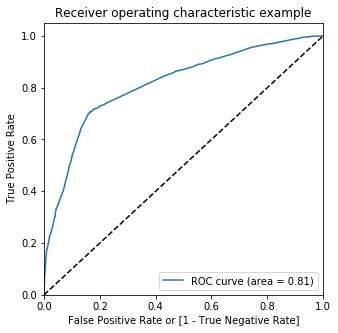

In [701]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [752]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(15)

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1886,1,0.636636,1,1,1,1,1,1,1,1,0,0,0,1
9139,0,0.171206,0,1,1,0,0,0,0,0,0,0,0,0
1786,1,0.225148,0,1,1,1,0,0,0,0,0,0,0,0
1590,0,0.225148,0,1,1,1,0,0,0,0,0,0,0,0
6623,0,0.225148,0,1,1,1,0,0,0,0,0,0,0,0
7228,1,0.638143,1,1,1,1,1,1,1,1,0,0,0,1
2181,0,0.185228,0,1,1,0,0,0,0,0,0,0,0,0
5795,1,0.914648,1,1,1,1,1,1,1,1,1,1,1,1
4269,1,0.655961,1,1,1,1,1,1,1,1,0,0,0,1
2069,1,0.914648,1,1,1,1,1,1,1,1,1,1,1,1


In [703]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381099  1.000000  0.000000
0.1   0.1  0.430210  0.991098  0.084834
0.2   0.2  0.655574  0.864349  0.527016
0.3   0.3  0.780452  0.717677  0.819107
0.4   0.4  0.784330  0.706231  0.832420
0.5   0.5  0.785622  0.701992  0.837118
0.6   0.6  0.784976  0.674862  0.852780
0.7   0.7  0.718094  0.328953  0.957713
0.8   0.8  0.679321  0.174226  0.990342
0.9   0.9  0.677868  0.168292  0.991647


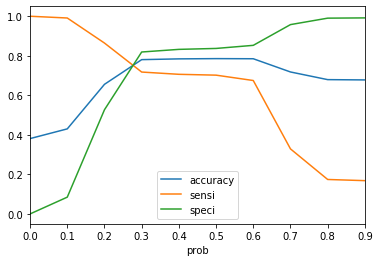

In [704]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [445]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head(15)

,Converted,Converted_Prob,predicted,final_predicted
1886,1,0.629279,1,1
9139,0,0.175163,0,0
1786,1,0.189457,0,0
1590,0,0.189457,0,0
6623,0,0.189457,0,0
7228,1,0.650439,1,1
2181,0,0.188415,0,0
5795,1,0.905047,1,1
4269,1,0.674540,1,1
2069,1,0.905047,1,1


In [446]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7794830371567044

In [447]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3131,  700],
       [ 665, 1694]], dtype=int64)

In [448]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [449]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7181008902077152

In [450]:
# Let us calculate specificity
TN / float(TN+FP)

0.8172800835291046

#### Precision and Recall

In [451]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3209,  622],
       [ 703, 1656]], dtype=int64)

##### Precision
TP / TP + FP

In [452]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7269534679543459

##### Recall
TP / TP + FN

In [453]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.701992369648156

In [454]:
#### Apply minmax scaler to scale all numeric variables.

scale = MinMaxScaler()
columns = X_test.columns
X_test[['TotalVisits']] = scale.fit_transform(X_test[['TotalVisits']])

In [455]:
X_test.shape

(3050, 17)

In [456]:
X_test = X_test[cols]

In [457]:
X_test

,Do Not Email,TotalVisits,A free copy of Mastering The Interview,LeadOrigin_Lead Add Form,LeadSource_Reference,TotalTime_2,TotalTime_3,TotalTime_4,PageView_2,PageView_4,PageView_6,PageView_8
4608,0,1.000,1,0,0,0,0,0,1,0,0,0
7935,1,0.250,1,0,0,1,0,0,1,0,0,0
4043,1,0.125,0,0,0,0,0,0,0,0,0,0
7821,0,0.250,0,0,0,0,0,0,1,0,0,0
856,0,0.375,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178,0,0.000,0,1,1,0,0,0,0,0,0,0
4247,0,0.375,0,0,0,0,0,0,1,0,0,0
5354,0,0.625,1,0,0,0,0,0,0,0,1,0
8581,0,0.000,0,1,0,0,0,0,0,0,0,0


In [458]:
X_test_sm = sm.add_constant(X_test)

In [459]:
y_test_pred = res.predict(X_test_sm)

In [460]:
y_test_pred[:10]

4608    0.220169
7935    0.293099
4043    0.062684
7821    0.170296
856     0.181760
927     0.228580
318     0.692231
1018    0.206894
8151    0.149431
1570    0.905047
dtype: float64

In [461]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [462]:
# Let's see the head
y_pred_1.head()

,0
4608,0.220169
7935,0.293099
4043,0.062684
7821,0.170296
856,0.181760


In [463]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [464]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [465]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [467]:
y_pred_final.head(15)

,Converted,0
0,1,0.220169
1,0,0.293099
2,0,0.062684
3,0,0.170296
4,0,0.181760
5,0,0.228580
6,1,0.692231
7,0,0.206894
8,0,0.149431
9,1,0.905047


In [473]:
# Renaming the column 
y_pred_final = y_pred_final.rename(columns={0:'y_pred'})

In [474]:
y_pred_final

,Converted,y_pred
0,1,0.220169
1,0,0.293099
2,0,0.062684
3,0,0.170296
4,0,0.181760
...,...,...
3045,1,0.905047
3046,0,0.181760
3047,1,0.175163
3048,1,0.951455


In [475]:
y_pred_final['final_predicted'] = y_pred_final.y_pred.map(lambda x: 1 if x > 0.28 else 0)

In [476]:
y_pred_final.head()

,Converted,y_pred,final_predicted
0,1,0.220169,0
1,0,0.293099,1
2,0,0.062684,0
3,0,0.170296,0
4,0,0.181760,0


In [478]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7918032786885246

In [480]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1519,  329],
       [ 306,  896]], dtype=int64)

In [481]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [482]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7454242928452579

In [483]:
# Let us calculate specificity
TN / float(TN+FP)

0.821969696969697